In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
pogo = Pogo()

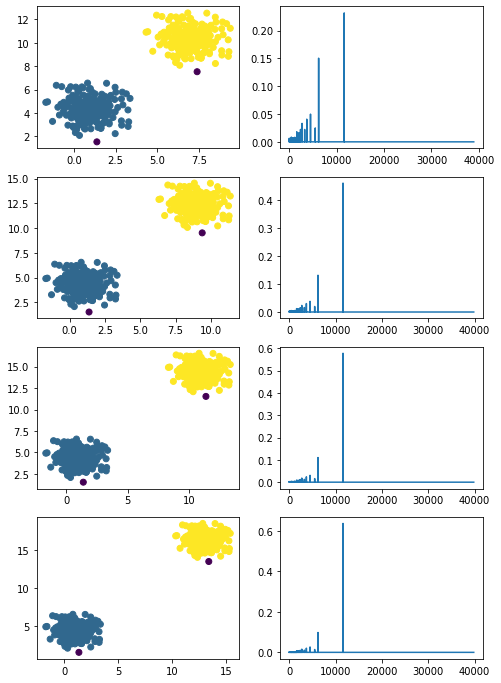

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(8,12))

X, y = datasets.make_blobs(n_samples=200, centers=1, n_features=2,
                   random_state=0)
X = np.append(X,np.copy(X)+6,axis=0)
y = np.append(y, np.copy(y)+6, axis=0)
pogo.fit(X)

axes[0, 0].scatter(X[:,0],X[:,1],c=pogo.labels_)
axes[0, 1].plot(pogo.gap_vector_)

X, y = datasets.make_blobs(n_samples=200, centers=1, n_features=2,
                   random_state=0)
X = np.append(X,np.copy(X)+8,axis=0)
y = np.append(y, np.copy(y)+8, axis=0)
pogo.fit(X)

axes[1, 0].scatter(X[:,0],X[:,1],c=pogo.labels_)
axes[1, 1].plot(pogo.gap_vector_)

X, y = datasets.make_blobs(n_samples=200, centers=1, n_features=2,
                   random_state=0)
X = np.append(X,np.copy(X)+10,axis=0)
y = np.append(y, np.copy(y)+10, axis=0)
pogo.fit(X)

axes[2, 0].scatter(X[:,0],X[:,1],c=pogo.labels_)
axes[2, 1].plot(pogo.gap_vector_)

X, y = datasets.make_blobs(n_samples=200, centers=1, n_features=2,
                   random_state=0)
X = np.append(X,np.copy(X)+12,axis=0)
y = np.append(y, np.copy(y)+12, axis=0)
pogo.fit(X)

axes[3, 0].scatter(X[:,0],X[:,1],c=pogo.labels_)
axes[3, 1].plot(pogo.gap_vector_)

plt.savefig('separating-blobs-testset')

plt.show()

In [5]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

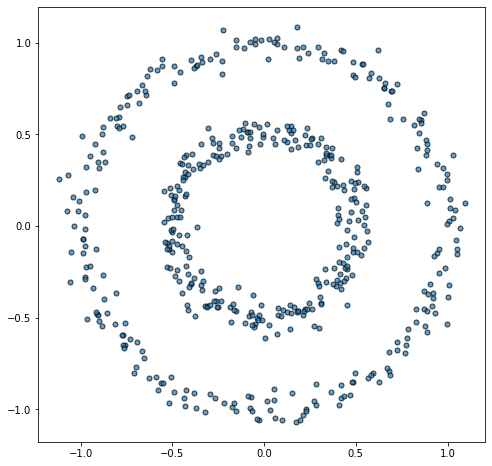

In [6]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

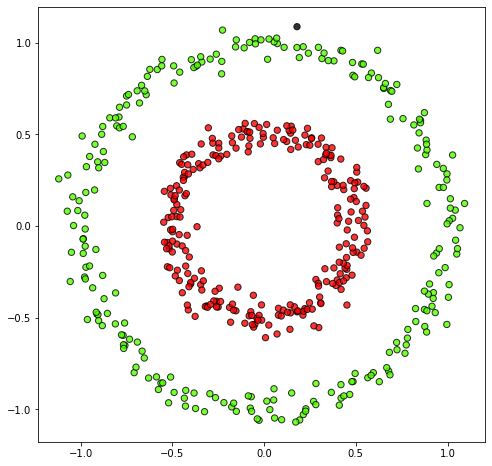

In [7]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [8]:
pogo.initial_idx_

2389

In [9]:
pogo.idx_

2320

In [10]:
pogo.candidates_[:20]

[2389,
 2320,
 2271,
 2251,
 2246,
 2818,
 2817,
 2816,
 3084,
 2977,
 2819,
 2820,
 3083,
 3082,
 2815,
 2822,
 2823,
 2824,
 2825,
 2821]

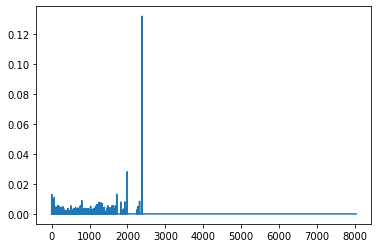

In [11]:
plt.plot(pogo.gap_vector_)

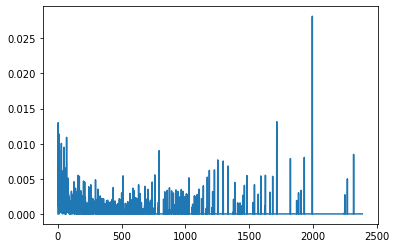

In [12]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2246


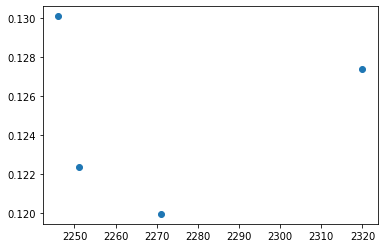

In [13]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 2320


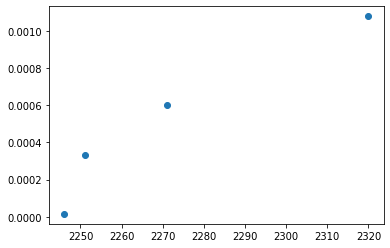

In [14]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 2320


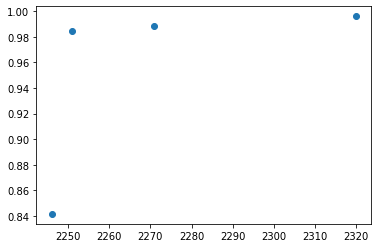

In [15]:
rand_indices, rand_array = pogo.plot_rand_score(y)


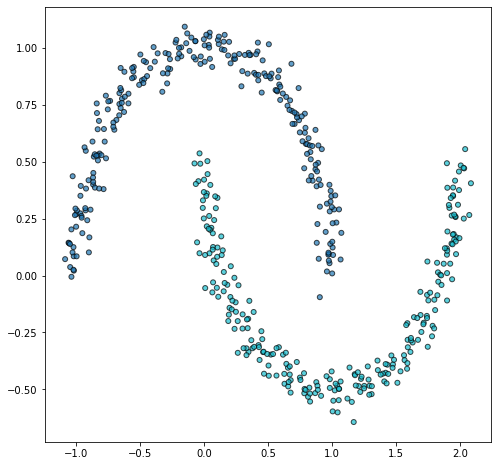

In [16]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

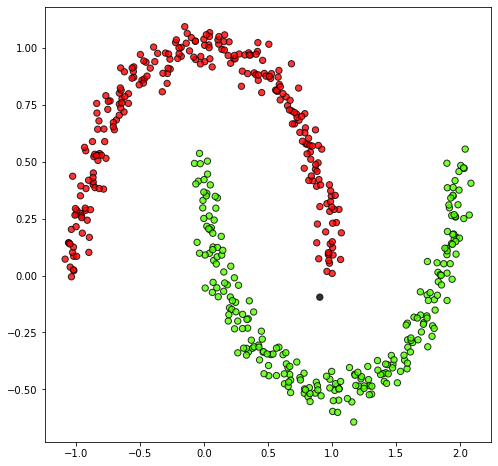

In [17]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [18]:
pogo.initial_idx_

3659

In [19]:
pogo.idx_

2621

In [20]:
pogo.candidates_[:10]

[3659, 2621, 2107, 2514, 12108, 4123, 4230, 4229, 4029, 4228]

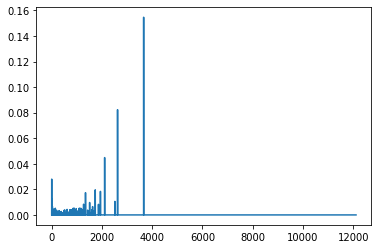

In [21]:
plt.plot(pogo.gap_vector_)

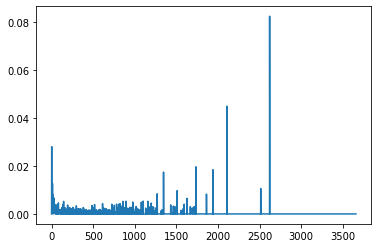

In [22]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2107


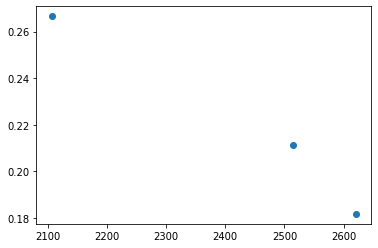

In [23]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 2621


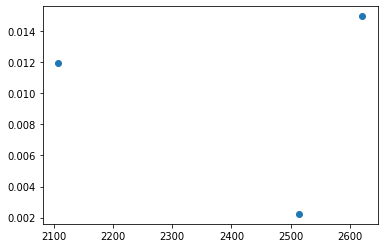

In [24]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 2621


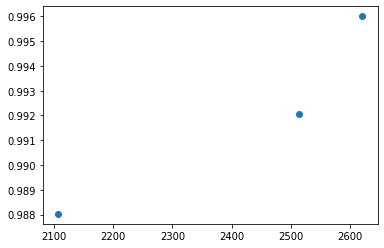

In [25]:
rand_indices, rand_array = pogo.plot_rand_score(y)


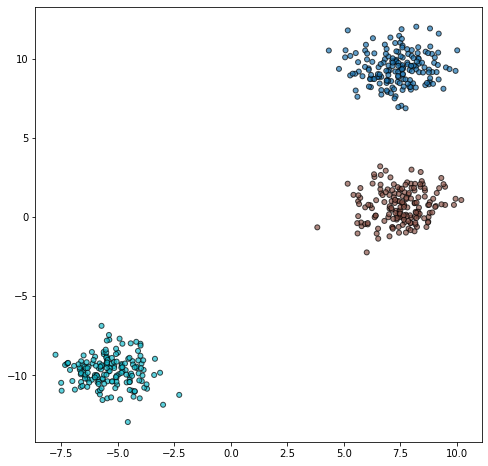

In [26]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

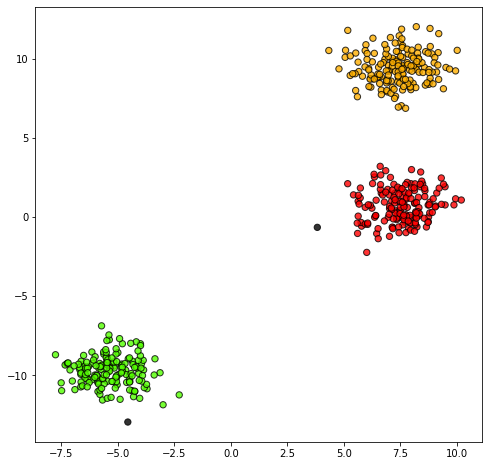

In [27]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [28]:
pogo.initial_idx_

22008

In [29]:
pogo.idx_

12286

In [30]:
pogo.candidates_[:20]

[22008,
 40162,
 16771,
 12286,
 8881,
 5322,
 10585,
 6624,
 4257,
 7996,
 3177,
 2924,
 2656,
 5107,
 4003,
 3739,
 2105,
 2470,
 2355,
 2014]

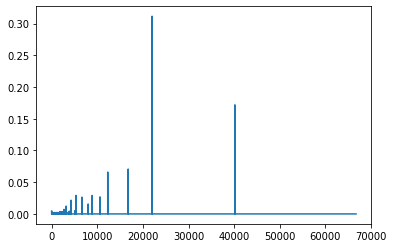

In [31]:
plt.plot(pogo.gap_vector_)

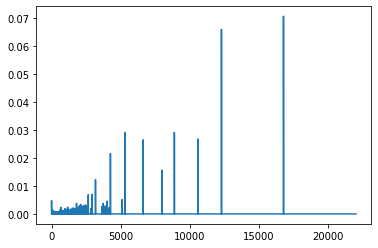

In [32]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 4257


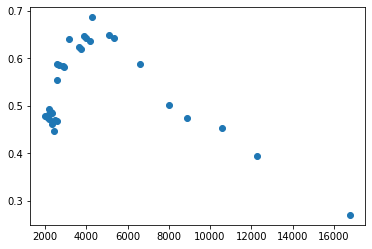

In [33]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12286


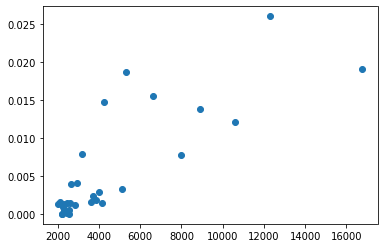

In [34]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 16771


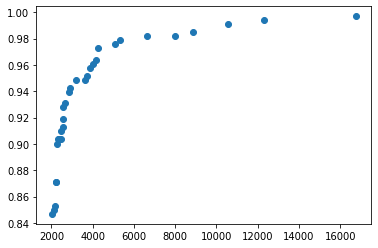

In [35]:
rand_indices, rand_array = pogo.plot_rand_score(y)


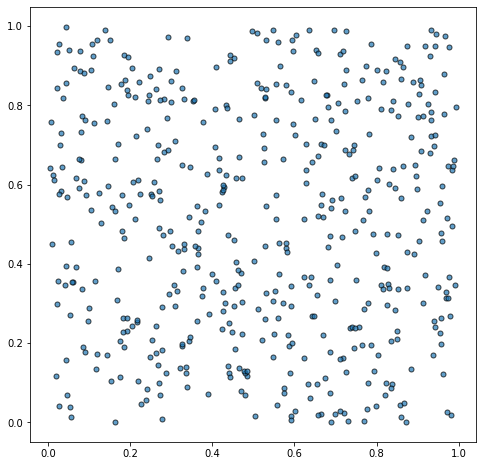

In [36]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

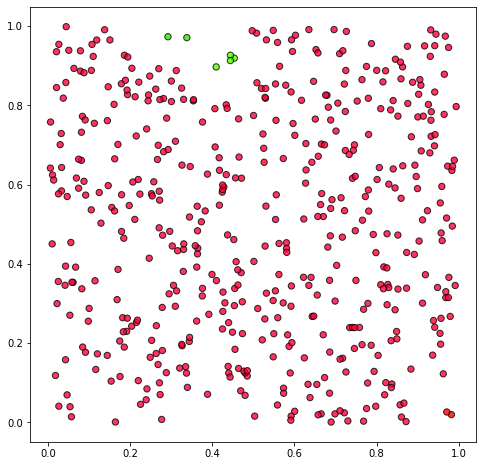

In [37]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [38]:
pogo.initial_idx_

2091

In [39]:
pogo.idx_

2091

In [40]:
pogo.candidates_[:20]

[2091,
 2523,
 2411,
 3329,
 2771,
 2781,
 2780,
 2779,
 2778,
 2777,
 2776,
 2775,
 2774,
 2773,
 2772,
 2770,
 2783,
 2769,
 2768,
 2767]

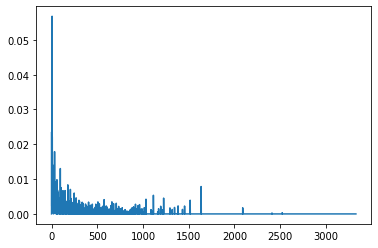

In [41]:
plt.plot(pogo.gap_vector_)

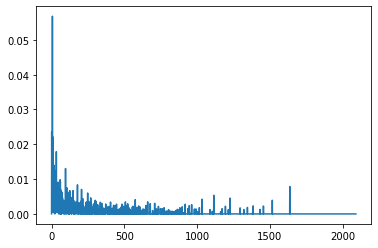

In [42]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

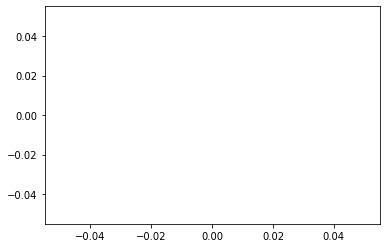

In [43]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

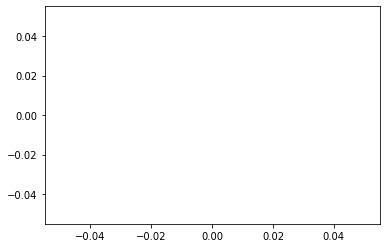

In [44]:
score_indices, score_array = pogo.plot_silhouette_score()

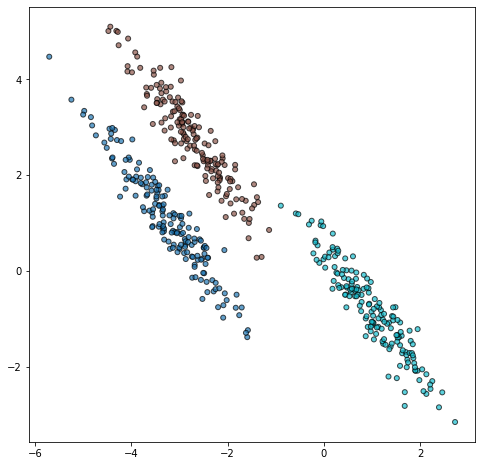

In [45]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

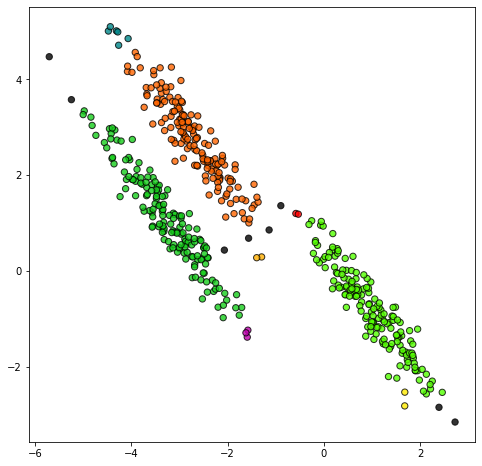

In [46]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [47]:
pogo.initial_idx_

4803

In [48]:
pogo.idx_

3035

In [49]:
pogo.candidates_[:20]

[4803,
 8321,
 3035,
 7101,
 4003,
 2643,
 6584,
 2482,
 3436,
 4498,
 3770,
 2133,
 2329,
 2843,
 3658,
 2249,
 2006,
 4380,
 6391,
 2985]

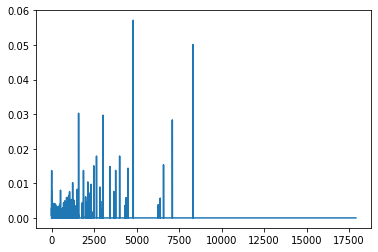

In [50]:
plt.plot(pogo.gap_vector_)

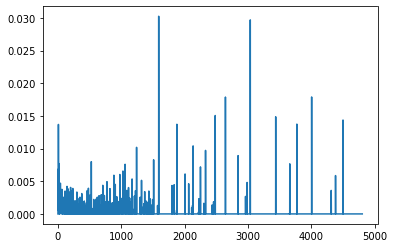

In [51]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2118


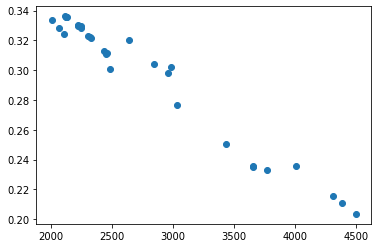

In [52]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 3035


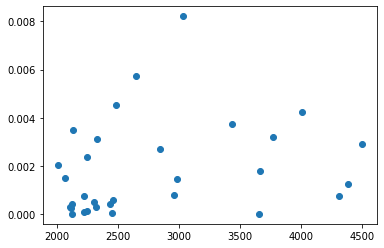

In [53]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 4498


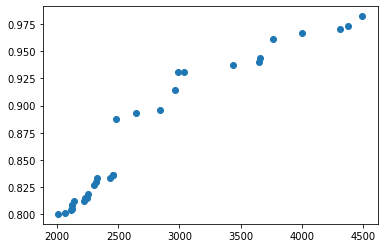

In [54]:
rand_indices, rand_array = pogo.plot_rand_score(y)


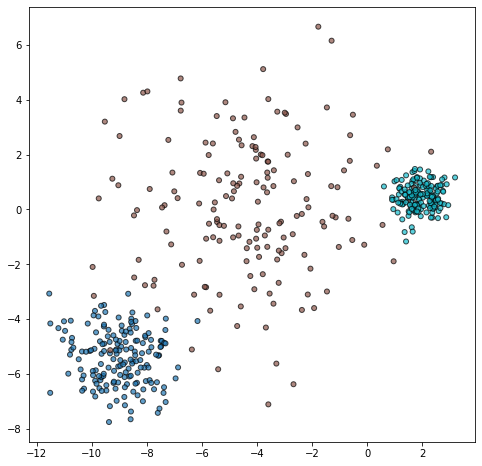

In [55]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

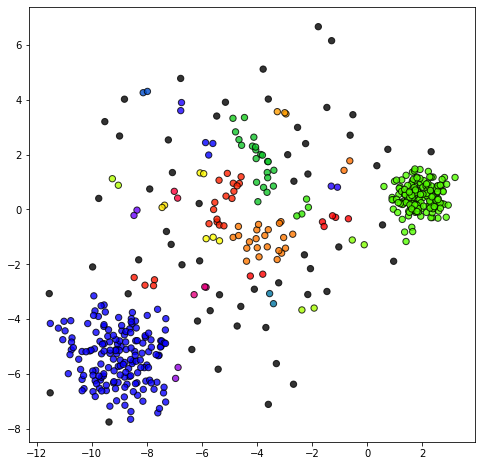

In [56]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [57]:
pogo.initial_idx_

18297

In [58]:
pogo.idx_

3849

In [59]:
pogo.candidates_[:20]

[18297,
 12260,
 15860,
 4283,
 5883,
 3849,
 8546,
 5369,
 17325,
 2662,
 6926,
 6221,
 10186,
 11139,
 9244,
 9570,
 4560,
 2443,
 3485,
 13559]

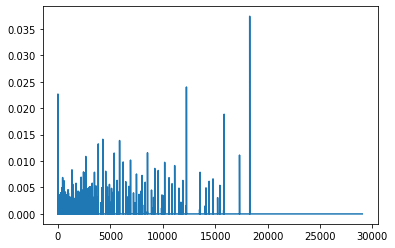

In [60]:
plt.plot(pogo.gap_vector_)

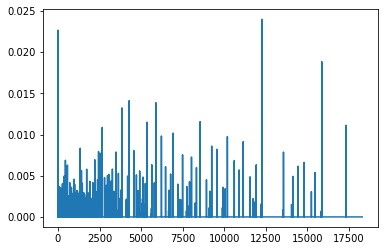

In [61]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2383


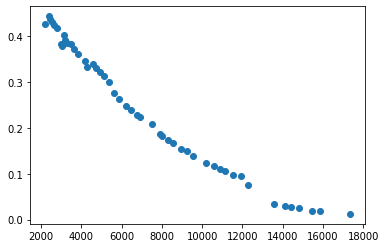

In [62]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 3849


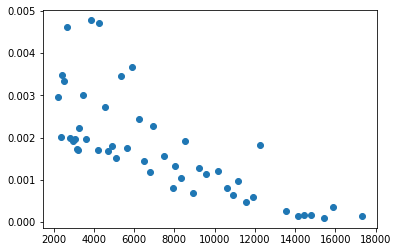

In [63]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 11921


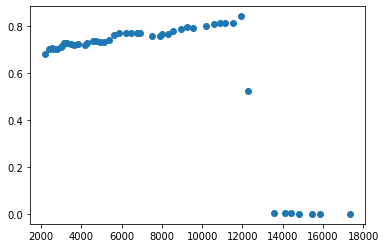

In [64]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [65]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

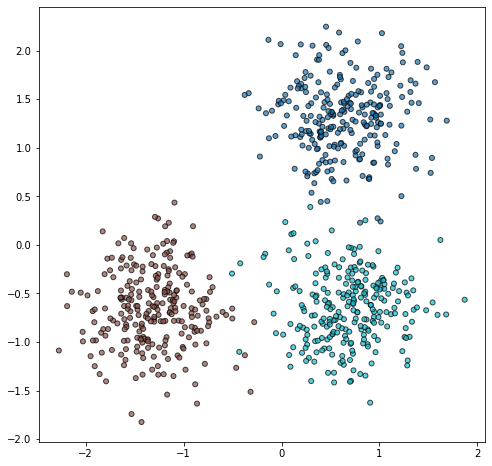

In [66]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

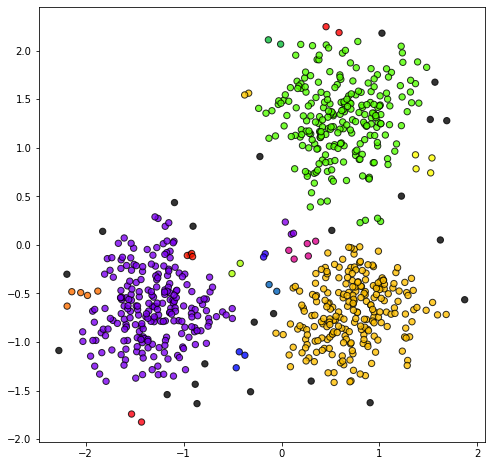

In [67]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [68]:
pogo.initial_idx_

10681

In [69]:
pogo.idx_

3904

In [70]:
pogo.candidates_[:20]

[10681,
 7424,
 3904,
 4182,
 9669,
 5875,
 4817,
 15598,
 5532,
 13506,
 6928,
 5290,
 3004,
 8461,
 12543,
 3227,
 3402,
 4609,
 8104,
 5136]

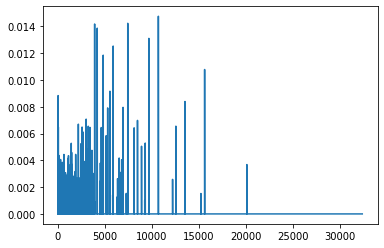

In [71]:
plt.plot(pogo.gap_vector_)

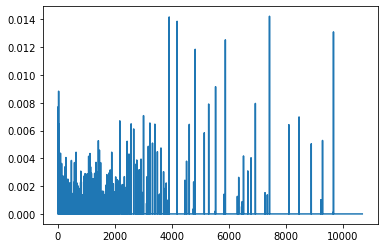

In [72]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 3171


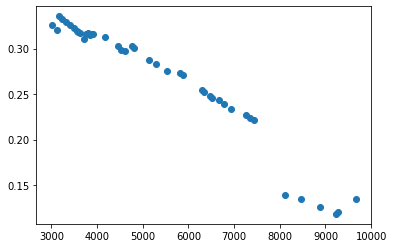

In [73]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 3904


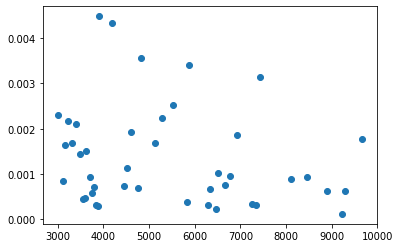

In [74]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 7348


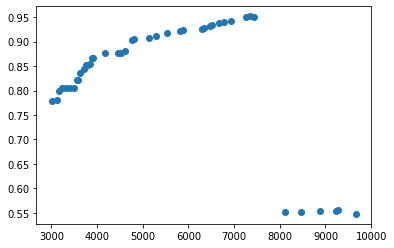

In [75]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [76]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [77]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [78]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


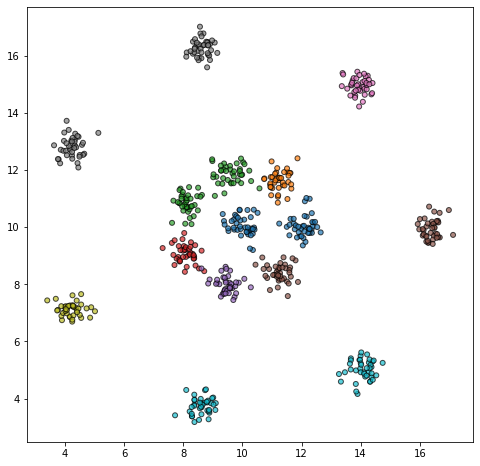

In [79]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

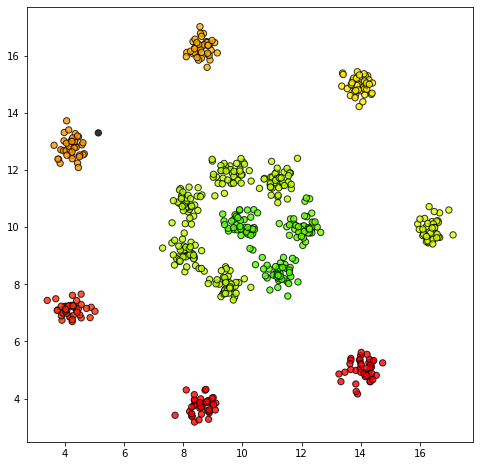

In [80]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [81]:
pogo.initial_idx_

7643

In [82]:
pogo.idx_

6053

In [83]:
pogo.candidates_[:20]

[7643,
 6053,
 3807,
 4346,
 7259,
 5481,
 6889,
 3187,
 5236,
 4962,
 5887,
 3481,
 2781,
 3613,
 4837,
 2606,
 2452,
 2933,
 3018,
 5160]

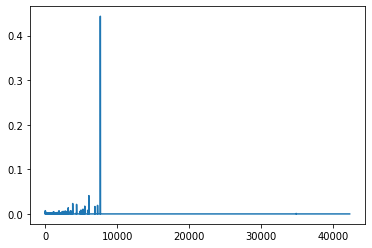

In [84]:
plt.plot(pogo.gap_vector_)

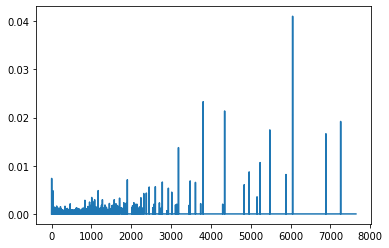

In [85]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2920


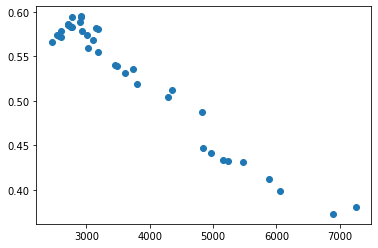

In [86]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 6053


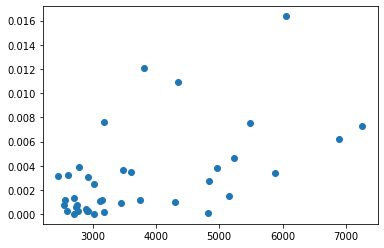

In [87]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 2920


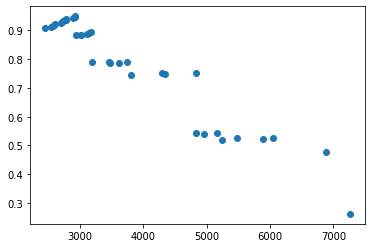

In [88]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [89]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


In [ ]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.initial_idx_

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:40]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

In [ ]:
score_indices, score_array = pogo.plot_silhouette_score()

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(y)
